In [1]:
import os
import sys
import json
import ipaddress
import numpy as np
from torch import nn
from sklearn.model_selection import train_test_split

class Resource:
  def __init__(self, RequestID, Site, LoadURL, LoadDomain, 
      Type, MimeType, RemoteIPAddr, ModTime):
    self.request_id = RequestID
    self.site = Site
    self.load_url = LoadURL
    self.load_domain = LoadDomain
    self.resource_type = Type
    self.mimetype = MimeType
    self.ip_addr = RemoteIPAddr
    self.mod_time = ModTime

# Function to parse and create Resources from JSON
def extract_from_JSON(filename):
    ip_to_occurrences = dict()
    ip_to_sites = dict()
    site_date_ipset = dict()
    with open(filename) as f:
        for line in f:
            data = json.loads(line)
            resource = Resource(data["RequestID"], data["Site"], data["LoadURL"], 
                                data["LoadDomain"], data["Type"], data["MimeType"], 
                                data["RemoteIPAddr"], data["ModTime"])
            
            # For ip occurrence filtering in entire dataset
            ip_to_occurrences.setdefault(resource.ip_addr, set())
            occurrence_event = resource.mod_time + " " + resource.site
            ip_to_occurrences[resource.ip_addr].add(occurrence_event)
    
            # For ips unique to a website
            ip_to_sites.setdefault(resource.ip_addr, set())
            ip_to_sites[resource.ip_addr].add(resource.site)
            
            # extracting samples
            site_date_ipset.setdefault(resource.site, dict())
            site_date_ipset[resource.site].setdefault(resource.mod_time, set())
            site_date_ipset[resource.site][resource.mod_time].add(resource.ip_addr)
    return ip_to_occurrences, ip_to_sites, site_date_ipset

In [2]:
filename = "../output/02-06-2020_1000-recurring_output.json"
ip_to_occurrences, ip_to_sites, site_date_ipset = extract_from_JSON(filename)

In [3]:
print(len(site_date_ipset), len(ip_to_occurrences), len(ip_to_sites))

974 54622 54622


In [4]:
# filtering passes: 
ips_to_remove = set()
for ip in ip_to_occurrences:
    occurrences = ip_to_occurrences[ip]
    if len(occurrences) < 20:
       ips_to_remove.add(ip)

for ip in ips_to_remove:
    try:
        del ip_to_occurrences[ip]
        del ip_to_sites[ip]
    except KeyError:
        print(ip, " Not Present")
     
unique_ip_to_site = dict()
# Does it make sense to filter the site out?
for ip in ip_to_sites:
    if len(ip_to_sites[ip]) == 1:
        site = ip_to_sites[ip].pop()
        unique_ip_to_site[ip] = site
        try:
            del site_date_ipset[site]
        except KeyError:
            print(site, " Not Present in map")
        try:
            del ip_to_occurrences[ip]
        except KeyError:
            print(ip, " Not Present")

# ip_to_occurrences holds all ips after filtering

104.com.tw  Not Present in map
104.com.tw  Not Present in map
104.com.tw  Not Present in map
104.com.tw  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
11st.co.kr  Not Present in map
123rf.com  Not Present in map
123rf.com  Not Present in map
123rf.com  Not Present in map
123rf.com  Not Present in map
123rf.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
126.com  Not Present in map
1337x.to  Not Present in map
1688.com  Not Present in map
1688.com  Not Present in map
1688.com  Not Present in map
1688.com  Not Present in map
1688.com  Not Present in map
1688.com  Not Pres

coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
coinmarketcap.com  Not Present in map
constantcontact.com  Not Present in map
constantcontact.com  Not Present in map
constantcontact.com  Not Present in map
constantcontact.com  Not Present in map
constantcontact.com  Not Present in map
corriere.it  Not Present in map
corriere.it  Not Present in map
corriere.it  Not Present in map
corriere.it  Not Present in map
corriere.it  Not Present in map
corriere.it  Not Present in map
costco.com  Not Present in map
costco.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not Present in map
coupang.com  Not P

farfetch.com  Not Present in map
farfetch.com  Not Present in map
farfetch.com  Not Present in map
farfetch.com  Not Present in map
farfetch.com  Not Present in map
farfetch.com  Not Present in map
farsnews.com  Not Present in map
farsnews.com  Not Present in map
farsnews.com  Not Present in map
farsnews.com  Not Present in map
farsnews.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fc2.com  Not Present in map
fedex.com  Not Present in map
fedex.com  Not Present in map
fedex.com  Not Present in map
feedly.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fidelity.com  Not Present in map
fiverr.com  Not Present in map
fiverr.com  Not Present i

jimdo.com  Not Present in map
jimdo.com  Not Present in map
jimdo.com  Not Present in map
jimdo.com  Not Present in map
jimdo.com  Not Present in map
jimdo.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
joins.com  Not Present in map
jooble.org  Not Present in map
jqw.com  Not Present in map
jqw.com  Not Present in map
jqw.com  Not Present in map
jqw.com  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.com.cn  Not Present in map
jrj.

mathworks.com  Not Present in map
mathworks.com  Not Present in map
mathworks.com  Not Present in map
mathworks.com  Not Present in map
mathworks.com  Not Present in map
mawdoo3.com  Not Present in map
mawdoo3.com  Not Present in map
mawdoo3.com  Not Present in map
mawdoo3.com  Not Present in map
mayoclinic.org  Not Present in map
mayoclinic.org  Not Present in map
mayoclinic.org  Not Present in map
mediafire.com  Not Present in map
mediafire.com  Not Present in map
medium.com  Not Present in map
medium.com  Not Present in map
medium.com  Not Present in map
medium.com  Not Present in map
medium.com  Not Present in map
medium.com  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
mega.nz  Not Present in map
memurlar.net  Not Present in map
memurlar.net  Not Present in map
memurlar.net  Not Present in map
memurlar.net  Not Pr

prothomalo.com  Not Present in map
provincial.com  Not Present in map
provincial.com  Not Present in map
provincial.com  Not Present in map
provincial.com  Not Present in map
provincial.com  Not Present in map
psychologytoday.com  Not Present in map
ptt.cc  Not Present in map
python.org  Not Present in map
python.org  Not Present in map
python.org  Not Present in map
python.org  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qq.com  Not Present in map
qualtrics.com  Not Present in map
quizlet.com  Not Present in map
quizlet.com  Not Present in map
quizlet.com  Not Present in map
quora.com 

tarafdari.com  Not Present in map
target.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
td.com  Not Present in map
teacherspayteachers.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
teamviewer.com  Not Present in map
techradar.com  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map
telegraph.co.uk  Not Present in map


visualstudio.com  Not Present in map
viva.co.id  Not Present in map
viva.co.id  Not Present in map
viva.co.id  Not Present in map
viva.co.id  Not Present in map
viva.co.id  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vnexpress.net  Not Present in map
vseigru.net  Not Present in map
vseigru.net  Not Present in map
w3schools.com  Not Present in 

In [5]:
print(len(site_date_ipset))

193


In [6]:
# create site to encoded ipset mapping
labels = []
encodings = []
all_ips = list(ip_to_occurrences.keys())
print(len(all_ips))
for site in site_date_ipset:
    date_to_ipset = site_date_ipset[site]
    for date in date_to_ipset:
        ipset = date_to_ipset[date]
        iparray = [0] * len(all_ips)
        for ip in ipset:
            if ip in ip_to_occurrences:
                iparray[all_ips.index(ip)] = 1
        labels.append(site)
        encodings.append(np.asarray(iparray))

print(len(labels), len(encodings))
                

9760
20786 20786


In [7]:
import pyasn
asndb = pyasn.pyasn('pyasn')
asn_set = set()
ip_to_asn = dict()
for ip in ip_to_occurrences:
    try:
        asn,_= asndb.lookup(ip)
        ip_to_asn[ip] = asn
        asn_set.add(asn)
    except:
        print(ip, " not mapped to asn")
        continue

  not mapped to asn


In [8]:
sites_asn = []
asn_enc = []
asn_list = list(asn_set)
for site in site_date_ipset:
    date_to_ipset = site_date_ipset[site]
    for date in date_to_ipset:
        ipset = date_to_ipset[date]
        asn_array = [0]*len(asn_list)
        for ip in ipset:
            if ip in ip_to_occurrences:
                try:
                    asn_array[asn_list.index(ip_to_asn[ip])] = 1
                except Exception as e:
                    continue
        sites_asn.append(site)
        asn_enc.append(np.asarray(asn_array))

In [9]:
print(len(sites_asn[0]), len(asn_enc[0]))
print(len(labels[0]), len(encodings[0]))

1 346
1 9760


In [10]:
import torch.nn.functional as F
class NNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 400)
        self.fc2 = nn.Linear(400, 100)
        self.fc3 = nn.Linear(100, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return self.fc3(x)

In [11]:
from sklearn import preprocessing
import torch

tensor_encodings = torch.Tensor(encodings)
le_labels = preprocessing.LabelEncoder()
tensor_labels = le_labels.fit_transform(labels)
tensor_labels = torch.as_tensor(tensor_labels)

tensor_asn_enc = torch.Tensor(asn_enc)
le_asn = preprocessing.LabelEncoder()
tensor_sites_asn = le_asn.fit_transform(sites_asn)
tensor_sites_asn = torch.as_tensor(tensor_sites_asn)

In [12]:
import torch.utils.data as data

ip_dataset = data.TensorDataset(tensor_encodings,tensor_labels)
asn_dataset = data.TensorDataset(tensor_asn_enc,tensor_sites_asn)

In [13]:
batch_size = 64
validation_split = .2
shuffle_dataset = True
random_seed= 42

In [14]:
train_size = int(0.8 * len(asn_dataset))
test_size = len(asn_dataset) - train_size
asn_train_dataset, asn_test_dataset = torch.utils.data.random_split(asn_dataset, [train_size, test_size])
asn_train_loader = torch.utils.data.DataLoader(asn_train_dataset, batch_size=batch_size)
asn_test_loader = torch.utils.data.DataLoader(asn_test_dataset, batch_size=batch_size)
print(len(asn_train_loader.dataset), len(asn_test_loader.dataset))

16628 4158


In [15]:
train_size = int(0.8 * len(ip_dataset))
test_size = len(ip_dataset) - train_size
ip_train_dataset, ip_test_dataset = torch.utils.data.random_split(ip_dataset, [train_size, test_size])
ip_train_loader = torch.utils.data.DataLoader(ip_train_dataset, batch_size=batch_size)
ip_test_loader = torch.utils.data.DataLoader(ip_test_dataset, batch_size=batch_size)
print(len(ip_train_loader.dataset), len(ip_test_loader.dataset))

16628 4158


In [16]:
input_size_ipdataset = len(tensor_encodings[0])
output_size_ipdataset = len(site_date_ipset)
embed_size_ipdataset = 1000

input_size_asndataset = len(tensor_asn_enc[0])
output_size_asndataset = len(site_date_ipset)
embed_size_asndataset = 270
print(input_size_ipdataset, output_size_ipdataset)
print(input_size_asndataset, output_size_asndataset)

9760 193
346 193


In [17]:
model_ip = NNet(input_size_ipdataset, output_size_ipdataset)
model_asn = NNet(input_size_asndataset, output_size_asndataset)

In [18]:
criterion = nn.CrossEntropyLoss(reduction='mean')
optimizer_ip = torch.optim.SGD(model_ip.parameters(), lr=0.1)
optimizer_asn = torch.optim.SGD(model_asn.parameters(), lr=0.1)

In [19]:
# Reference: https://github.com/hunkim/PyTorchZeroToAll

from torch.autograd import Variable
from sklearn.metrics import confusion_matrix
import time
device = 'cpu'

def confusion_mat(preds, labels, conf_matrix):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, labels):
        conf_matrix[p, t] += 1
    
    return conf_matrix

def train(epoch, train_loader, model, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader, model, conf_matrix):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        conf_matrix = confusion_mat(output, target, conf_matrix)
        # sum up batch loss
        test_loss += criterion(output, target).item()
        # get the index of the max
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')
    
    

In [20]:
# first ip dataset training and tests
since = time.time()
print(len(ip_train_loader.dataset), len(ip_test_loader.dataset))
conf_matrix_ip = torch.zeros(output_size_ipdataset, output_size_ipdataset)
for epoch in range(1, 10):
    epoch_start = time.time()
    train(epoch, ip_train_loader, model_ip, optimizer_ip)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    test(ip_test_loader, model_ip, conf_matrix_ip)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Testing time: {m:.0f}m {s:.0f}s')

m, s = divmod(time.time() - since, 60)
print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')

print("conf mat ip: ", conf_matrix_ip)

16628 4158
Train Epoch: 1 | Batch Status: 0/16628 (0%) | Loss: 5.247474
Train Epoch: 1 | Batch Status: 640/16628 (4%) | Loss: 5.264957
Train Epoch: 1 | Batch Status: 1280/16628 (8%) | Loss: 5.244285
Train Epoch: 1 | Batch Status: 1920/16628 (12%) | Loss: 5.259657
Train Epoch: 1 | Batch Status: 2560/16628 (15%) | Loss: 5.265240
Train Epoch: 1 | Batch Status: 3200/16628 (19%) | Loss: 5.239521
Train Epoch: 1 | Batch Status: 3840/16628 (23%) | Loss: 5.241588
Train Epoch: 1 | Batch Status: 4480/16628 (27%) | Loss: 5.246440
Train Epoch: 1 | Batch Status: 5120/16628 (31%) | Loss: 5.237908
Train Epoch: 1 | Batch Status: 5760/16628 (35%) | Loss: 5.226582
Train Epoch: 1 | Batch Status: 6400/16628 (38%) | Loss: 5.235725
Train Epoch: 1 | Batch Status: 7040/16628 (42%) | Loss: 5.212133
Train Epoch: 1 | Batch Status: 7680/16628 (46%) | Loss: 5.226388
Train Epoch: 1 | Batch Status: 8320/16628 (50%) | Loss: 5.197351
Train Epoch: 1 | Batch Status: 8960/16628 (54%) | Loss: 5.200312
Train Epoch: 1 | Batc

Train Epoch: 5 | Batch Status: 8960/16628 (54%) | Loss: 2.200885
Train Epoch: 5 | Batch Status: 9600/16628 (58%) | Loss: 2.336325
Train Epoch: 5 | Batch Status: 10240/16628 (62%) | Loss: 1.672930
Train Epoch: 5 | Batch Status: 10880/16628 (65%) | Loss: 2.240141
Train Epoch: 5 | Batch Status: 11520/16628 (69%) | Loss: 2.242005
Train Epoch: 5 | Batch Status: 12160/16628 (73%) | Loss: 2.273625
Train Epoch: 5 | Batch Status: 12800/16628 (77%) | Loss: 2.133298
Train Epoch: 5 | Batch Status: 13440/16628 (81%) | Loss: 2.247782
Train Epoch: 5 | Batch Status: 14080/16628 (85%) | Loss: 1.989320
Train Epoch: 5 | Batch Status: 14720/16628 (88%) | Loss: 1.857529
Train Epoch: 5 | Batch Status: 15360/16628 (92%) | Loss: 2.190943
Train Epoch: 5 | Batch Status: 16000/16628 (96%) | Loss: 2.234845
Training time: 0m 8s
Test set: Average loss: 0.0328, Accuracy: 1944/4158 (47%)
Testing time: 0m 9s
Train Epoch: 6 | Batch Status: 0/16628 (0%) | Loss: 1.848976
Train Epoch: 6 | Batch Status: 640/16628 (4%) | Lo

In [21]:
# Now asn dataset training and tests
since = time.time()
criterion = nn.CrossEntropyLoss(reduction='mean')
print(len(asn_train_loader.dataset), len(asn_test_loader.dataset))
conf_matrix = torch.zeros(output_size_ipdataset, output_size_ipdataset)

for epoch in range(1, 10):
    epoch_start = time.time()
    train(epoch, asn_train_loader, model_asn, optimizer_asn)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    test(asn_test_loader, model_asn, conf_matrix)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Testing time: {m:.0f}m {s:.0f}s')

m, s = divmod(time.time() - since, 60)
print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')
print("conf mat asn: ", conf_matrix)

16628 4158
Train Epoch: 1 | Batch Status: 0/16628 (0%) | Loss: 5.269417
Train Epoch: 1 | Batch Status: 640/16628 (4%) | Loss: 5.253896
Train Epoch: 1 | Batch Status: 1280/16628 (8%) | Loss: 5.233767
Train Epoch: 1 | Batch Status: 1920/16628 (12%) | Loss: 5.244421
Train Epoch: 1 | Batch Status: 2560/16628 (15%) | Loss: 5.229500
Train Epoch: 1 | Batch Status: 3200/16628 (19%) | Loss: 5.253322
Train Epoch: 1 | Batch Status: 3840/16628 (23%) | Loss: 5.218911
Train Epoch: 1 | Batch Status: 4480/16628 (27%) | Loss: 5.229983
Train Epoch: 1 | Batch Status: 5120/16628 (31%) | Loss: 5.201849
Train Epoch: 1 | Batch Status: 5760/16628 (35%) | Loss: 5.223286
Train Epoch: 1 | Batch Status: 6400/16628 (38%) | Loss: 5.226878
Train Epoch: 1 | Batch Status: 7040/16628 (42%) | Loss: 5.187521
Train Epoch: 1 | Batch Status: 7680/16628 (46%) | Loss: 5.173053
Train Epoch: 1 | Batch Status: 8320/16628 (50%) | Loss: 5.153162
Train Epoch: 1 | Batch Status: 8960/16628 (54%) | Loss: 5.158530
Train Epoch: 1 | Batc

Train Epoch: 5 | Batch Status: 11520/16628 (69%) | Loss: 2.489784
Train Epoch: 5 | Batch Status: 12160/16628 (73%) | Loss: 2.653854
Train Epoch: 5 | Batch Status: 12800/16628 (77%) | Loss: 2.122652
Train Epoch: 5 | Batch Status: 13440/16628 (81%) | Loss: 1.886896
Train Epoch: 5 | Batch Status: 14080/16628 (85%) | Loss: 1.790329
Train Epoch: 5 | Batch Status: 14720/16628 (88%) | Loss: 2.118350
Train Epoch: 5 | Batch Status: 15360/16628 (92%) | Loss: 1.910042
Train Epoch: 5 | Batch Status: 16000/16628 (96%) | Loss: 1.988958
Training time: 0m 1s
Test set: Average loss: 0.0349, Accuracy: 1716/4158 (41%)
Testing time: 0m 1s
Train Epoch: 6 | Batch Status: 0/16628 (0%) | Loss: 2.166246
Train Epoch: 6 | Batch Status: 640/16628 (4%) | Loss: 2.113273
Train Epoch: 6 | Batch Status: 1280/16628 (8%) | Loss: 1.885710
Train Epoch: 6 | Batch Status: 1920/16628 (12%) | Loss: 2.454725
Train Epoch: 6 | Batch Status: 2560/16628 (15%) | Loss: 1.987574
Train Epoch: 6 | Batch Status: 3200/16628 (19%) | Loss:

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     fmt = '.2f'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("temp.png")
    plt.show()

In [61]:
def print_conf_mat_info(conf_matrix, n_classes, labels):
    TP = conf_matrix.diag()
    for c in range(n_classes):
        idx = torch.ones(n_classes).bool()
        idx[c] = 0
        TN = conf_matrix[idx.nonzero()[:,None], idx.nonzero()].sum()
        FP = conf_matrix[c, idx].sum()
        FN = conf_matrix[idx, c].sum()

        sensitivity = (TP[c] / (TP[c]+FN))
        specificity = (TN / (TN+FP))

        print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(
            labels[c], TP[c], TN, FP, FN))
        print('Sensitivity = {}'.format(sensitivity))
        print('Specificity = {}'.format(specificity))

Class !
TP 0.0, TN 37422.0, FP 0.0, FN 0.0
Sensitivity = nan
Specificity = 1.0
Class 163.com
TP 0.0, TN 37404.0, FP 0.0, FN 18.0
Sensitivity = 0.0
Specificity = 1.0
Class 3c.tmall.com
TP 0.0, TN 37269.0, FP 0.0, FN 153.0
Sensitivity = 0.0
Specificity = 1.0
Class 4399.com
TP 128.0, TN 36670.0, FP 608.0, FN 16.0
Sensitivity = 0.8888888955116272
Specificity = 0.983690083026886
Class 45eijvhgj2.com
TP 0.0, TN 37206.0, FP 0.0, FN 216.0
Sensitivity = 0.0
Specificity = 1.0
Class 49oa3o49b6.com
TP 0.0, TN 37278.0, FP 0.0, FN 144.0
Sensitivity = 0.0
Specificity = 1.0
Class 52pojie.cn
TP 135.0, TN 37219.0, FP 5.0, FN 63.0
Sensitivity = 0.6818181872367859
Specificity = 0.9998656511306763
Class addthis.com
TP 122.0, TN 37256.0, FP 4.0, FN 40.0
Sensitivity = 0.7530864477157593
Specificity = 0.9998926520347595
Class adexchangegate.com
TP 42.0, TN 37233.0, FP 0.0, FN 147.0
Sensitivity = 0.2222222238779068
Specificity = 1.0
Class amazon.com
TP 116.0, TN 37217.0, FP 7.0, FN 82.0
Sensitivity = 0.5858585

Class google.es
TP 0.0, TN 37197.0, FP 0.0, FN 225.0
Sensitivity = 0.0
Specificity = 1.0
Class google.fr
TP 0.0, TN 37215.0, FP 0.0, FN 207.0
Sensitivity = 0.0
Specificity = 1.0
Class google.gr
TP 0.0, TN 37188.0, FP 0.0, FN 234.0
Sensitivity = 0.0
Specificity = 1.0
Class google.hu
TP 0.0, TN 37170.0, FP 0.0, FN 252.0
Sensitivity = 0.0
Specificity = 1.0
Class google.it
TP 0.0, TN 37191.0, FP 24.0, FN 207.0
Sensitivity = 0.0
Specificity = 0.9993550777435303
Class google.nl
TP 0.0, TN 37170.0, FP 0.0, FN 252.0
Sensitivity = 0.0
Specificity = 1.0
Class google.pl
TP 0.0, TN 37143.0, FP 0.0, FN 279.0
Sensitivity = 0.0
Specificity = 1.0
Class google.pt
TP 0.0, TN 37296.0, FP 0.0, FN 126.0
Sensitivity = 0.0
Specificity = 1.0
Class google.ro
TP 1.0, TN 37219.0, FP 5.0, FN 197.0
Sensitivity = 0.005050505045801401
Specificity = 0.9998656511306763
Class google.ru
TP 0.0, TN 37222.0, FP 2.0, FN 198.0
Sensitivity = 0.0
Specificity = 0.9999462962150574
Class google.se
TP 0.0, TN 37215.0, FP 0.0, FN 

Confusion matrix, without normalization
tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ..., 114.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,  64.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   1., 137.]])


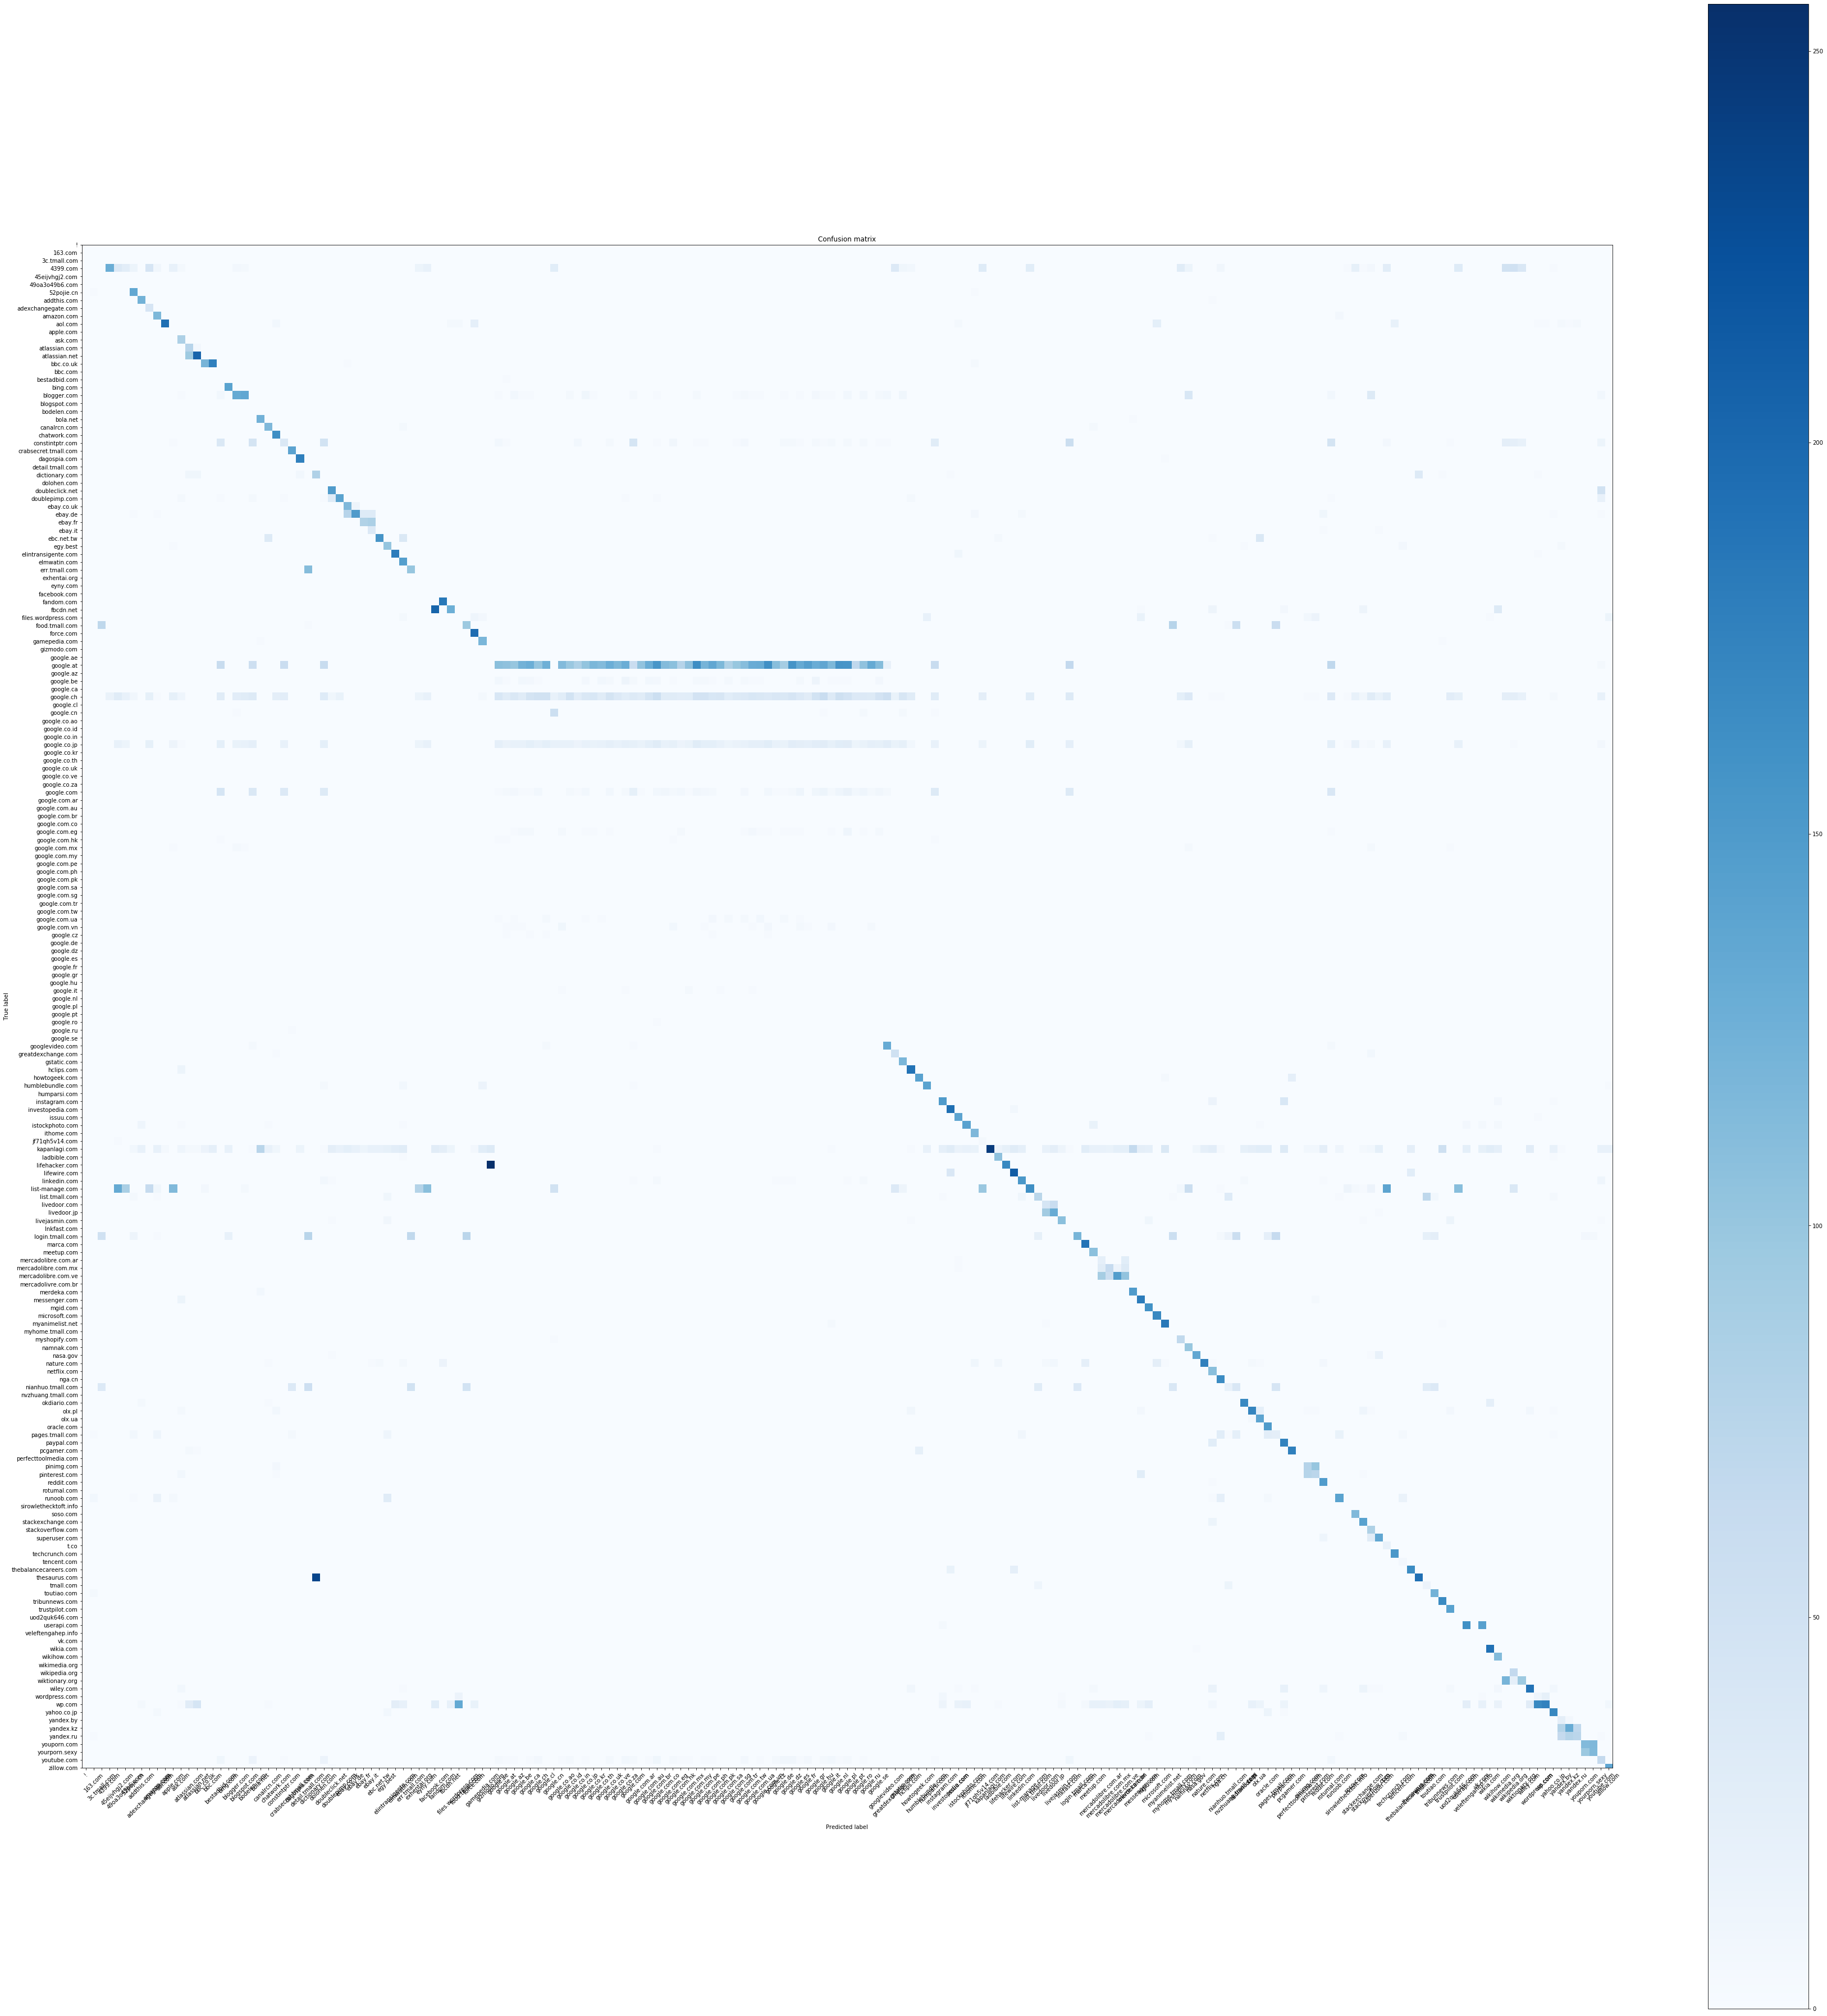

In [62]:
import itertools
print_conf_mat_info(conf_matrix_ip, output_size_ipdataset, le_labels.classes_)
print(le_labels.classes_, len(le_labels.classes_))
fig = plt.gcf()
fig.set_size_inches(50, 50)
fig.savefig('test2png.png', dpi=100)
plot_confusion_matrix(conf_matrix_ip, le_labels.classes_, False)

In [63]:
print(conf_matrix_ip.diag())

tensor([  0.,   0.,   0., 128.,   0.,   0., 135., 122.,  42., 116., 193.,   0.,
         83.,  75., 204., 120.,   0.,   0., 140., 132.,   0.,   0., 123., 115.,
        162.,  37., 139., 176.,   0.,  81.,   0., 148., 140., 115., 148.,  80.,
         34., 156., 101., 180., 144., 100.,   0.,   0.,   0., 184., 126.,   0.,
         96., 196., 118.,   0.,   0., 105.,   0.,   7.,   0.,  49.,   0.,  55.,
          0.,   0.,   0.,  19.,   0.,   0.,   0.,   0.,   0.,  21.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   8.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 130.,  51., 118., 189., 141., 140.,   0.,
        148., 193., 138., 141., 115.,   4., 243., 105., 168., 211., 152., 162.,
         73.,  43., 130., 107.,   0., 119., 189., 107.,  22.,  63., 146.,   0.,
        148., 180., 159., 168., 184.,   0.,  67.,  99., 135., 176., 108., 165.,
         18.,   0., 168., 171., 138., 14